# Statistics and Data Journalism
## HODP Bootcamp Week 5
### March 2019

With thanks to Seth Billiau, who first created this bootcamp.

In [2]:
# Run this cell to make sure you have the requirements 
# It should return 0. Then, comment it out. 

import os 
os.system("pip3 install -r requirements.txt")

0

### Goals for this week:
* Significance tests
  - Two sample t-tests
  - One sample t-tests
* Confidence intervals
* Causal effects and potential outcomes
* Regression

(thanks to Josh Angrist for the inspiration for the theme of this bootcamp)

### Statistics
We frequently debate the causal effects of health insurance. Does health insurance affect your health? Health care costs? What might happen if we expand free health insurance to more people? *Are the insured better off than they would have been if they had not been insured?*

Implicit in this question is a non-obvious "what-if" comparison: what if you did/did not have health insurance? Would you be as healthy?

We can observe the health differences between the insured and non-insured. But this may just tell us something about the people who are lucky enough to have health insurance in the United States. Let's set the stage by looking at the 2009 National Health Interview Survey, which measured health on a 5 point scale. 

First, we'll load it in:

In [12]:
import pandas as pd
import numpy as np

nhis = pd.read_csv("NHIS2009_clean.csv")
nhis.head()

,year,inc1,inc2,inc3,inc4,inc5,inc6,inc7,inc8,serial,...,yedu,empl,hlth,inc,incmp,brooks,marradult,marradult_empl,adltempl,hi_hsb1
0,2009,19282.932,41679.344,61102.973,85985.781,167844.53,25398.326,109725.27,70834.641,1,...,14.0,1,4,19282.932,17500,1,0,0,0,NaN
1,2009,19282.932,41679.344,61102.973,85985.781,167844.53,25398.326,109725.27,70834.641,3,...,14.0,0,4,19282.932,17500,1,1,0,1,NaN
2,2009,19282.932,41679.344,61102.973,85985.781,167844.53,25398.326,109725.27,70834.641,3,...,4.0,0,5,19282.932,17500,0,0,0,1,NaN
3,2009,19282.932,41679.344,61102.973,85985.781,167844.53,25398.326,109725.27,70834.641,3,...,NaN,0,5,19282.932,17500,0,0,0,1,NaN
4,2009,19282.932,41679.344,61102.973,85985.781,167844.53,25398.326,109725.27,70834.641,3,...,11.0,1,4,19282.932,17500,1,1,1,1,0.0


## Hypothesis Tests and P-Values
### Are the insured healthier than the uninsured?
#### A quick note on satistical vs causal inference 
In statistical inference, we:
* Draw a sample from the population of interest
* Use this sample to support conclusions about the population. We can either evaluate (test) hypotheses (are the uninsured healthier?), or measure (estimate) population parameters (how wealthy are the insured?)
* We execute (a) and (b) via sampling varaince. This is the randomness of the *sampling distribution*, that is, the *distribution of sample statistics in repeated samples*. 

This differs from *causal* inference. (How?)

Some terminology: we are interested in estimating *pararameters* , which are fixed but unknown. We estimate these with *sample statistics*, which are known instantiates of random estimators that vary as a function of our data. 

#### Two sample t-tests
We're going to conduct a two sample t-test. We can do this with SciPy's built in t-test function. 

A two sample t-test is a test of how "far" two sample statistics are from each other; we're usually trying to see if they are significantly different from each other. You may have been taught about Type I/Type II error, and the "power" of tests, but we don't care about this in practice. Let's use Python to see if the health of the insured and uninsured are significantly different.

Let's also plot a histogram of our observations using matplotlib, to get an idea of what we're looking at: 

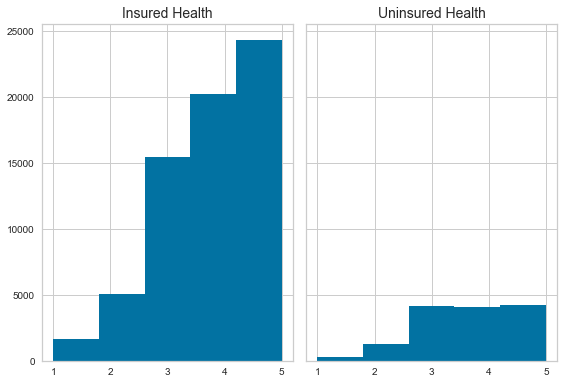

In [24]:
import matplotlib
import matplotlib.pyplot as plt

insured = nhis[nhis.hi == 1]
uninsured = nhis[nhis.hi == 0]
n_bins = 5
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
ax[0].hist(insured.hlth, bins=n_bins)
ax[0].set_title("Insured Health", fontsize=14)
ax[1].hist(uninsured.hlth, bins=n_bins)
ax[1].set_title("Uninsured Health", fontsize=14)

plt.show()

Seems like the insured are healthier. And indeed: 

In [14]:
from scipy import stats

print("Difference in means", np.mean(insured.hlth) - np.mean(uninsured.hlth))
stats.ttest_ind(insured.hlth, uninsured.hlth, equal_var = False)

NameError: name 'insured' is not defined

But what about their other characteristics? Let's look at income and employment, coded as "inc" and "empl" in our dataset. 

If you have time, try testing race, age, education, and family size. Are all of these significant?

In [1]:
# difference in income 


In [2]:
# difference in employment 


### Interpreting the Results
Now, we have a p-value. The p-value is often misunderstood or improperly interpreted, so it's very important to know what it actually means. **A p-value is the probability of observing our data given that the null hypothesis is correct.** Here, the null hypothesis is that the means are equal. 

*(A common pitfall when interpreting p-values is to think of the p-value as the probability of the null hypothesis being correct, but this interpretation is wrong.)*

In general, a common rule of thumb is to reject the null hypothesis when the p-value is less than 0.05. When we fail to reject the null hypothesis, we should never say that we "accept" or "prove" the null. All we have done is failed to reject it; we can never prove the null hypothesis true.

In this case, with high p-values (< 0.001), we can reject the null hypothesis. We have significant evidence that the insured are healthier than the uninsured, but they are also far wealthier, and more likely to be employed. 

We could also think about this as testing if the difference in means is "significantly far from" zero, the hypothesized "true" value. This is called a one-sample test. To run such a test, you can use the stats.ttest_1samp() command (documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

These days, people don't like to report p-values as much: instead, we look at the standard error, and think about the confidence interval.

Equally important in data journalism: add an interpretation of your data analysis here! 

### Multiple testing problem
The p-value is the probability of observing a "significant" result, given that the populations are not *actually* different. But if we test a large number of different hypotheses, we are likely to get at least one significant result -- trivially, if we test 20 parameters and all are equal between the populations, we would get one significant result *in expectation*!

In this case, we usually use an F-test (ANOVA) instead. As a rule, if you are testing more than 3-4 differences in means, you should be concerned about this -- ask us for more info!

### A note on non-normality and other tests
If our normality assumptions fail for our observations, we would be better off performing a nonparametric test like a permutation test. A permutation works by assuming that the labels of "insured" and "uninsured" make no difference in determining proportions. Therefore, shuffling up the labels should not affect averages between the two groups. 

In practice, the Central Limit Theorem tells us repeated random samples give us normal distributions.

The permutation test works by shuffling labels and computing differences in means many times. This produces a distribution of test statistics. Then, we calculate a p-value by finding the probability of observing a test statistic as extreme or more extreme than the one produced by our particular permutation of labels and proportions. 

Code to do this is given below. 

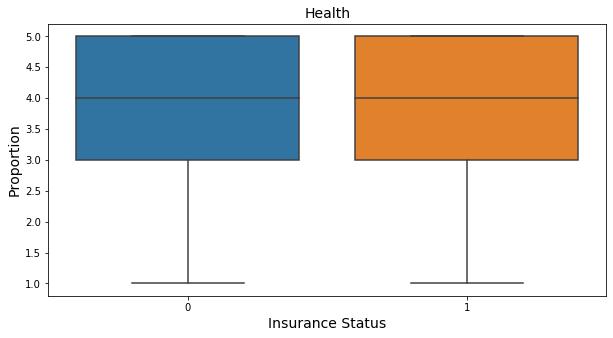

0.0

In [8]:
import seaborn as sns
from mlxtend.evaluate import permutation_test

f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(x='hi', y='hlth', data=nhis)
ax.set_xlabel("Insurance Status", fontsize=14)
ax.set_ylabel("Proportion", fontsize=14)
ax.set_title("Health", fontsize=14)
plt.show()

p_value = permutation_test(insured.hlth, uninsured.hlth,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)

p_value

This test does not assume normality, but it does assume that the two groups are drawn from the same distribution. This assumption needs to be checked as well. We will check it by using boxplots. The trade off is that while permutation tests are great for calculating p-values, unlike t-tests they aren't great for confidence intervals.

## Confidence Intervals

We already have some intuition about confidence intervals, since we've performed a t test. The t statistic is normal (for large values of n), regardless of the distribution of the underlying data. The "critical value" for our test is the value of t that gives us our threshold value of p that we chose earlier. For p = 0.05, it's approximately 2. 

A 95% confidence interval brackets the population mean of our variable 95% of the time. *What time is that?* When we draw repeated samples! 

But we don't draw repeated samples: we only draw one. But this statement tells us how likely the interval is to cover the population mean *if we were to draw such repeated samples*.

What's a 100% confidence interval?

Now, let's construct a 95% confidence interval for the difference in income between the insured and uninsured.

We have to do a bit more work to generate a confidence interval in Python. We need to provide SciPy's interval function with a confidence level, a center (the sample mean), and a scale (the standard error, which is the sample standard deviation divided by the square root of one less than the length of the dataset).

In [9]:
mean = np.mean(insured.hlth) - np.mean(uninsured.hlth) 
sigma = np.sqrt(np.power(np.std(insured.hlth),2) + np.power(np.std(uninsured.hlth),2))

conf_int = stats.norm.interval(0.95, 
                               loc = mean, 
                               scale = sigma/np.sqrt(len(insured.hlth) + len(uninsured.hlth) - 1))
conf_int

(0.132866974503495, 0.15328166826782458)

Cool! We can verify our p-value here intuitively. What's not in our interval?

## Observed versus Potential Outcomes
*Causal effect or selection bias?*

When it comes to differences by insurance status, *ceteris* is not *paribus*. A little formal notation makes the difference precise. For each person, indexed by $i$, define two possibilities:
* Health of person $i$ when $i$ is insured: $Y_{1i}$
* Health of person $i$ when $i$ is uninsured: $Y_{0i}$

The causal effect of insurance on person $i$ is 

$$ Y_{1i} - Y_{0i} $$

We can hope to measure the average causal effect, $E[Y_{1i}-Y_{0i}]$, or the effect of *treatment on the treated*, that is $E[Y_{1i}-Y_{0i}|D_i = 1]$, where $D$ is a dummy that is equal to $1$ if the individual is insured. The first tells us if insurance benefits all in the population, on average, while TOT tells us if those in the insured population benefit from *their coverage*. 

Why can't we observe this? Write out TOT as:

$$ E[Y_{1i}-Y_{0i}|D_i=1] = E[Y_{1i}|D_i=1] - E[Y_{0i}|D_i=1] $$

But, we can *never* observe $E[Y_{0i}|D_i=1]$. Why? 

What if we just considered:

$$ E[Y_{i}|D_i=1] - E[Y_{i}|D_i=0] $$

Why is this not satisfying? We have an intuition, but let's quantify this just a bit more. 

$$ E[Y_{i}|D_i=1] - E[Y_{i}|D_i=0] = E[Y_{1i}|D_i=1] - E[Y_{0i}|D_i=0] $$
$$ = E[Y_{1i} - Y_{0i}|D_i=1] + \{E[Y_{0i}|D_i=1] - E[Y_{0i}|D_i=0] \} $$

The naiive difference we computed is the causal effect plus the term in curly brackets, which we call the *selection bias*. Intuitively, it's the additional amount that people without health insurance would have been better off if they had health insurance. 

An aside: it's pretty rare that we'll be able to show causation in a HODP article, so it's important to frame most of our work as a correlation or trend we noticed, rather than as a direct cause. Often, though, it will intuitively make sense that there "should" or at least "could" be a causal connection. In those cases, make sure to frame your writing as a "possible explanation" than as a statement of what is going on. Cite other research on whether such a trend has a causal effect, or to cite relevant quantitative work.

## Random Assignment
Random assignment eliminates selection bias. The insured and uninsured are the same in every other way! Convince yourself of this by looking at the above math if we knew $E[Y_{1i}|D_i=1] = E[Y_{1i}|D_i=0]$. The average causal effect is the same as the average causal effect on the treated. 

### We aren't running experiments! Why did you explain all this?
Randomized research designs are a somewhat unnatainable ideal. We can't often do them. But, by understanding the framework, we can judge our attempts by how closely they're able to shape up. 

The first question to be answered when thinking about causal effects is thus always: *What's the experiment you'd like to do?*

## The RAND Health Insurance Experiment
In the 1970s, researchers at RAND randomly assigned 6,000 people to experimental insurance plans that required either no cost-sharing, a modest deductible, or 25%, 50%, or 95% coinsurance rates on subscribes. For more on this, check out Aron-Dine et. al (2013), which I've put in the repo. 

I've gone through and cleaned the dataset for you. The no cost-sharing "Free" plan is plantype 1, plantype 2 is the "Individual Deductible", plantype 3 are the two "Cost-Sharing", and plantype 4 is the 95% coinsurance "Catastrophic" plan.


Let's import the data and see what happened:

In [13]:
rand = pd.read_csv("randhie_health.csv")
rand.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (284,288) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,person,site,instat,bfamily,bhh,xperson,baseld,enrterm,enrdate,annd,...,cap,capx,pfi,pfix,mhi,mhix,ghindx,ghindxx,merge2,merge3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,using only (2),master only (1)
1,MA250247,Dayton,1.0,KA100082,JA000082,MA250271,19740618.0,5.0,19750201.0,201.0,...,NaN,100.0,5.0,5.0,95.000000,94.699997,NaN,71.599998,matched (3),matched (3)
2,MA250255,Dayton,1.0,KA100082,JA000082,MA250271,19740618.0,5.0,19750201.0,201.0,...,NaN,100.0,5.0,5.0,93.800003,76.099998,NaN,69.300003,matched (3),matched (3)
3,MA250263,Dayton,1.0,KA100082,JA000082,MA250271,19740618.0,5.0,19750201.0,201.0,...,NaN,100.0,5.0,5.0,98.699997,96.800003,NaN,92.000000,matched (3),matched (3)
4,MA250271,Dayton,1.0,KA100082,JA000082,MA250271,19740618.0,5.0,19750201.0,201.0,...,NaN,100.0,5.0,5.0,96.300003,80.300003,NaN,73.900002,matched (3),matched (3)


## Impact?
Did those on the "free" plan become healthier? Let's find out: compare ghindxx, a measure of health at exit of the survey, across the "Catastrophic" and "Free" groups. 

In [21]:
free = rand[rand.plantype == 1]
catastrophic = rand[rand.plantype == 4]

# difference in means 

# we need to drop NaNs here, so add .dropna() to the two subgroups you're comparing 

# Generate a confidence interval for the difference



## Life and death?

Economists before RAND believed that health spending was inelastic, that is, you went to the hospital when you *needed* to, it didn't vary depending on what it cost. (Why is this important?)

Did giving people healthcare make them spend more on insurance? Run a t test where you compare plantype 1 and 4, for instance, using hosp_spend, which is the sum of in-patient and out-patient spending.

What if we just look at in-patient (inpdol) spending? Why might that be different? 

Why might we care about this? How would you report these results?

In [10]:
rand = pd.read_csv("randhie_spending.csv")
rand.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (73,123,275,279) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,person,year,spending,inp,out,out_rand,mental,mdcl,drugs,supplies,...,mde,coins,coins_dental,inpdol,outpdol,meddol,totadm,outsum,hosp_spend,plantype
0,MA250247,1,14.35,0.0,14.35,14.35,0.0,14.35,14.35,0.0,...,1000.0,1.00,1.00,0.0,0.0,14.35,0.0,14.35,14.35,4
1,MA250247,2,115.15,0.0,115.15,115.15,0.0,115.15,24.65,0.0,...,1000.0,0.95,0.95,0.0,90.5,115.15,0.0,115.15,115.15,4
2,MA250247,3,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,1000.0,0.95,0.95,0.0,0.0,0.00,0.0,0.00,0.00,4
3,MA250247,4,110.00,0.0,110.00,0.00,0.0,0.00,0.00,0.0,...,1000.0,0.95,0.95,0.0,0.0,0.00,0.0,0.00,0.00,4
4,MA250247,5,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,1000.0,0.95,0.95,0.0,0.0,0.00,0.0,0.00,0.00,4


In [3]:
# Write a t-test comparing hosp_spend across plantypes here 

# Generate a confidence interval for the difference

In [8]:
# now compare indpol

In [9]:
# construct a confidence interval for the difference in hosp_spend or impdol! 

## Basic Regression
Regression is a very useful tool for prediction. Linear regressions allow us to easily model a linear relationship between a response/dependent/Y variable and 1 or more predictor/independent/X variables. We define the regression of $Y$ on $X$ as the *best linear predictor* of $Y$ given $X$. 

Formally, we define regression as the minimum mean squared error for the expression $E[Y_i - \alpha - \beta X_i]^2$. We can define $\beta$ as $\text{cov}(X_i,Y_i)/\text{var}(X_i)$, and $\alpha$ as $E[Y_i] - E[X_i]\beta$. To prove this, just take a derivative of our MSE equation and solve for the unknowns! Regression has some very nice mathematical properties that we won't go into here. If you plan to use regression in your project, please come talk to us for a more in depth treatment of the subject!

Regressions in Python are fairly easy to do: we just need a Y list, and at least one X list of equal length! Note that we'll need to reshape the data a bit first.

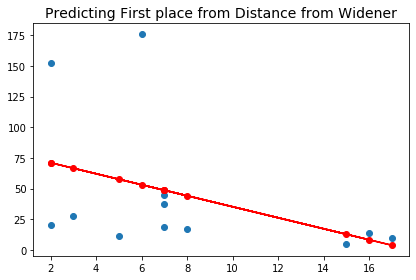

80.00570187347272 [-4.48493076]
[-0.41418385]
(-0.414183846812948, 0.18070743478976728)


In [14]:
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats.stats import pearsonr

lm = linear_model.LinearRegression()
rankings = pd.read_csv("house_rankings_2018.csv")
houses = rankings.House
rankings.set_index("House", inplace = True)

#walking time from Widener Library (in minutes), from Google Maps
dist = [2, 15, 7, 8, 3, 5, 7, 16, 7, 2, 17, 6]

# Reshape distances as a column vector
dist_reshaped = np.array(dist).reshape(-1,1)
first_place = [rankings.values[i,0] for i in range(0, 12)]

#X, Y is the order
reg = lm.fit(dist_reshaped, first_place)
beta0, beta1 = reg.intercept_, reg.coef_
y_predict = np.multiply(dist_reshaped,beta1) + beta0

fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)
ax.scatter(dist_reshaped, first_place)
plt.plot(dist_reshaped, y_predict, '-o',color='r')
ax.set_title("Predicting First place from Distance from Widener", fontsize=14)
plt.show()
print(beta0, beta1)

# Demystifying Beta1
covariance = beta1 * np.var(dist) 
cor = covariance / (np.std(dist) * np.std(first_place))
print(cor)
print(pearsonr(first_place, dist))

You can also do this a slightly different way using an OLS object to get more information. You just have to further reformat your data. 

In [15]:
dist_reshaped_ols = sm.add_constant(dist_reshaped)
mod = sm.OLS(first_place,dist_reshaped_ols)
results = mod.fit()
results.summary()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.071
Date:                Fri, 28 Feb 2020   Prob (F-statistic):              0.181
Time:                        19:04:16   Log-Likelihood:                -63.934
No. Observations:                  12   AIC:                             131.9
Df Residuals:                      10   BIC:                             132.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.0057     29.279      2.733      0.021      14.768     145.243
x1            -4.4849      3.117     -1.439      0.181     -11.429       2.460
==============================================================================
Omnibus:                        8.123   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                4.173
Skew:                           1.378   Prob(JB):                        0.124
Kurtosis:                       3.864   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpreting your Coefficients
In simple regression, we can interpret the coefficients easily. In this case, the coefficient 1.468 is the change in Leverett ratings for a one unit change in Boston temperature. 

The coefficient -42.97 is the predicted number of Leverett ratings if the monthly high temperature in Boston was 0. 

### Aside: Demystifying Beta_1 
Somewhat unsurprisingly, there is a relationship between beta_1 and your correlation. It turns out, if your X's and Y's are standardized, then your correlation coefficient is equal to your beta_1 coefficient. You can actually get from beta1 to the correlation coefficient really easily by doing some simple algebra. 


In [16]:
# Demystifying Beta1
covariance = beta1 * np.var(dist) 
cor = covariance / (np.std(dist) * np.std(first_place))
print(cor)
print(pearsonr(first_place, dist)[0])

[-0.41418385]
-0.414183846812948


## Assumptions
* Linearity
* Equal Spread 
* Normality of Errors
* Independence of assumptions

We can check the first three of these with a plot of our linear model and a plot of the residuals versus the predicted value. These plots are given below. We can see from the plots that there's a problem. Well two, actually. There are clearly two outliers throwing everything off!

Into the weeds about the plots: From the first plot, we see that there appear to be two outliers - influential points - that are skewing our model. The residual histogram seems to make our normality of errors assumption questionable, but that's mostly caused by the outliers as well. Our residuals vs. predicted plot looks terrible as well because of these two outliers. Although there's no obvious pattern in our residuals, they don't appear to have equal spread. 

Take a Stats course for more clarity on the assumptions. If you don't get all of this, that's okay. You'll never put this in your article, but I would feel like I'm committing statistical malpractice if I didn't at least make you aware of the assumptions regarding regression. 

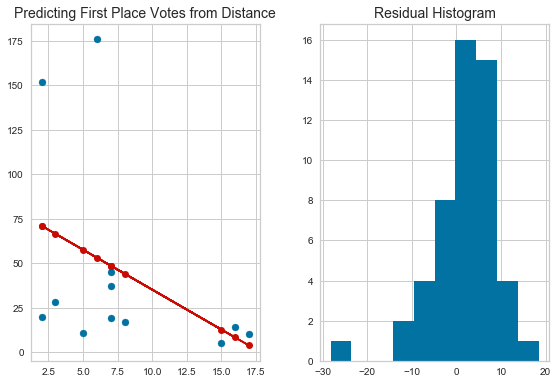

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

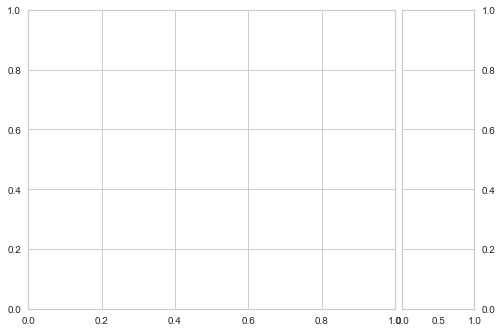

In [28]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(1, 2, tight_layout=True)
ax[0].scatter(dist_reshaped, first_place)
ax[0].plot(dist_reshaped, y_predict, '-o',color='r')
ax[0].set_title("Predicting First Place Votes from Distance", fontsize=14)
ax[1].hist(results.resid)
ax[1].set_title("Residual Histogram", fontsize=14)
plt.show()

visualizer = ResidualsPlot(reg)
visualizer.fit(dist_reshaped, first_place)
visualizer.show()

Now, let's investigate those outliers

In [29]:
rankings['dist'] = dist 
rankings

,1,2,3,4,5,6,7,8,9,10,11,12,dist
House,,,,,,,,,,,,,
Adams,20,15,24,38,37,44,67,75,74,28,32,80,2
Cabot,5,13,16,17,7,20,16,31,49,118,148,94,15
Kirkland,19,19,35,50,71,63,72,70,56,24,24,31,7
Mather,17,15,19,25,27,40,44,67,112,37,55,76,8
Quincy,28,43,55,90,71,82,65,44,21,17,14,4,3
Leverett,11,22,40,73,76,81,94,66,36,18,11,6,5
Dunster,45,67,113,56,70,42,44,52,19,10,11,5,7
Currier,14,10,16,15,18,19,20,23,43,92,114,150,16
Eliot,37,57,60,67,57,76,49,40,38,23,16,14,7


The outliers are Lowell and Winthrop! I suspect that the recent renovations are causing these two houses to have lots of first place votes despite their distances from Widener. If only there was some way to control for renovations...

## Multiple Regression

We can also run a regression model with more than one predictor variables. All you have to do is add the predictors to your design matrix X and use the lm.fit() command. This allows us to control for confounding variables.

Here, I've fitted a model to predict number of first-choice votes each house received, with two predictor variables. I've given you two possible variables below, though you're welcome to find more, or different ones. Again, note that you may need to reshape data.

*Hint: You still need to find the dependent variable, and structure it like the `levCounts` variable above.*

In [30]:
#walking time from Widener Library (in minutes), from Google Maps
dist = [2, 15, 7, 8, 3, 5, 7, 16, 7, 2, 17, 6]
#was the house renovated in last 10 years? 1 if true
renovated = [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1]

X = np.matrix([dist, renovated]).transpose()
Y = [rankings.values[i,0] for i in range(0, 12)]
Y = np.array([Y]).reshape(-1, 1)

reg = lm.fit(X, Y)
[reg.intercept_, reg.coef_]

[array([31.89518947]), array([[-1.40647675, 56.9746036 ]])]

Again, you can do this using an OLS Object as well with properly formatted data. 

In [31]:
X_ols = sm.add_constant(X)
mod = sm.OLS(Y,X_ols)
results = mod.fit()
results.summary()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     2.464
Date:                Sun, 01 Mar 2020   Prob (F-statistic):              0.140
Time:                        13:34:31   Log-Likelihood:                -62.443
No. Observations:                  12   AIC:                             130.9
Df Residuals:                       9   BIC:                             132.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.8952     40.678      0.784      0.453     -60.125     123.916
x1            -1.4065      3.486     -0.403      0.696      -9.292       6.479
x2            56.9746     35.759      1.593      0.146     -23.918     137.867
==============================================================================
Omnibus:                        1.891   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                0.658
Skew:                           0.572   Prob(JB):                        0.720
Kurtosis:                       3.089   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now let's plot our prediction lines again.

[31.89518947 -1.40647675 56.9746036 ]


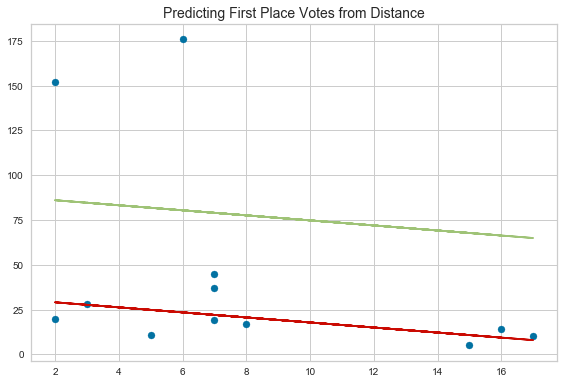

In [32]:
#X, Y is the order
coef = results.params
print(coef)
y_predict = np.multiply(dist_reshaped,beta1) + beta0

x = np.linspace(1,17,100)
y_0 = coef[1]*dist_reshaped+coef[0]
y_1 = (coef[1])*dist_reshaped + coef[0] + coef[2]

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.scatter(dist_reshaped, first_place)
ax.plot(dist_reshaped, y_0, '-',color='r')
ax.plot(dist_reshaped, y_1, '-',color='g')
ax.set_title("Predicting First Place Votes from Distance", fontsize=14)
plt.show()

Obviously, this helped a lot. 

## Interpreting your Coefficients
In multiple regression, we control for certain variables by introducing them as predictors. In this case, the coefficient -1.4065 is the change in first-place votes for a one unit change in distance from Widener library controlling for whether or not a house has been renovated. 

The coefficient 56.9746 is the change in first-place votes for a one unit change in the renovations indicator variable holding distance from Widener library constant. In other words, if a house is renovated, we can expect a 56.9746 increase in first-place votes, controlling for distance to Widener. 

Sometimes, we have coefficients whose interpretations don't really make that much sense or that aren't really useful. For example, the coefficient 31.8952 is the expected number of first place votes that a non-renovated house 0 minutes from Widener would receive. While this isn't hard to interpret, it's not that useful unless Harvard was thinking about bulldozing Widener to build a new house. 

### Prediction
Finally, one of the most useful things we can do with a predictive model is make predictions! Assuming you called your model `reg`, use the command below to predict the number of first choice votes for Adams House after the renovations.

In [33]:
reg.predict(np.array([[2, 1]]))

array([[86.05683956]])

## Your Turn
I've loaded in a dataset on Presidential elections by state courtesy of Stat 139. Try to predict gap16repub using multiple predictors. 

In [6]:
pres = pd.read_csv("pres_elections_bystate.csv")
pres.head()

import statsmodels.api as sm

## TODO ##


NameError: name 'pd' is not defined